In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

#from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.8em;
line-height:1.1em;
padding-left:0em;
padding-right:0em;
}
</style>
""")



In [2]:
%pylab inline
import matplotlib
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy import fft, arange
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25,'font.family': 'serif'})
#print(plt.style.available)
#style.use('dark_background')

Populating the interactive namespace from numpy and matplotlib


In [3]:
from readremote import read_data,find_exc_prop
import statistics

ImportError: No module named statistics

In [ ]:
nfiles = 10
ndir=6
year = ['1788','1813','1838']
year = ['1838']
year = linspace(2000,2200,21)
nyear = len(year)
#eq = ['80','82','84','86','88','90','92','94']
neq = 15
eqf = linspace(8.0,9.4,neq)


nreali = 24
max_val = zeros([nyear,neq,nreali])

for i in range(nyear):
    for j in range(neq):
        dummy = '{test:3.2f}'.format(test=eqf[j])
        mag_name = dummy.replace('.', '')
        for k in range(nreali):
            path = str('/work/dragonstooth/weiszr/SLR/run_RCP45NA_{yeara}_{eqa}_{test1:04d}/_output/gauge10010.txt'.format(yeara=int(year[i]),eqa=mag_name,test1=k))
            local_f = 'gauge1_RCP45NA_{yeara}_{eqa}_{test1:04d}.dat'.format(yeara=int(year[i]),eqa=mag_name,test1=k)
           # print "\t",path," -> ", local_f
            max_val[i,j,k] = read_data(local_f)


In [10]:
a=a

NameError: name 'a' is not defined

In [821]:
print shape(max_val)


TypeError: 'numpy.float64' object is not callable

In [872]:
t_type = 1
x1=0
x2=15
if t_type == 1:
    y2000 = []
    y2050 = []
    y2100 = []
    xy2000 = []
    xy2050 = []
    xy2100 = []
    for i in range(x1,x2):
        #for j in range(nreali):
        y2000.append(mean(max_val[0,i,:]))
        xy2000.append(eqf[i])
        y2050.append(mean(max_val[5,i,:]))
        xy2050.append(eqf[i])
        y2100.append(mean(max_val[10,i,:]))
        xy2100.append(eqf[i])
if t_type == 2:
    y2000 = []
    y2100 = []
    xy2000 = []
    xy2100 = []
    for i in range(x1,x2):
        for j in range(nreali):
            y2000.append(max_val[0,i,j])
            xy2000.append(eqf[i])
            y2100.append(max_val[5,i,j])
            xy2100.append(eqf[i])    
    
    
y2000 = array(y2000)
y2050 = array(y2050)
y2100 = array(y2100)


In [873]:
s = 1


if s ==1: 
    y2000_s = sort(y2000)
    y2050_s = sort(y2050)
    y2100_s = sort(y2100)
if s == 0:
    y2000_s = y2000
    y2100_s = y2100

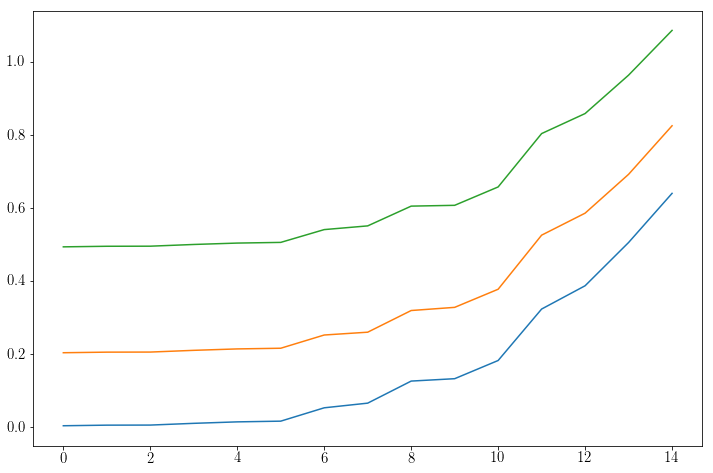

In [874]:
plot(y2000_s)
plot(y2050_s)
plot(y2100_s)
#plot(y2100.sort())

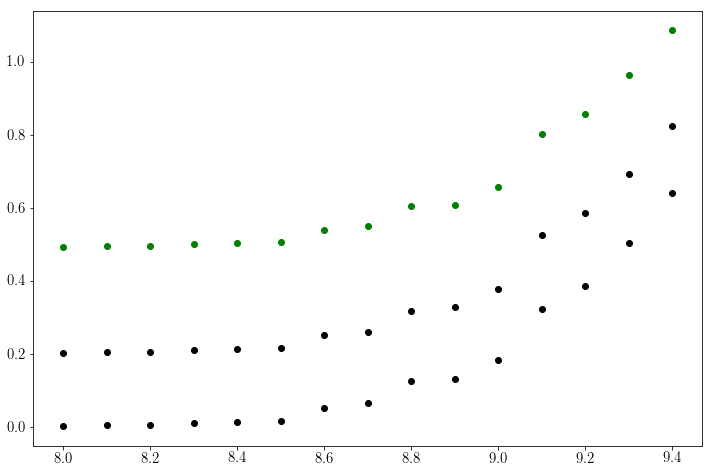

In [875]:
plot(xy2000,y2000_s,'ko')
plot(xy2050,y2050_s,'ko')
plot(xy2100,y2100_s,'go')

In [833]:
histogram(y2000_s)

(array([8, 1, 2, 0, 0, 1, 1, 1, 0, 1]),
 array([ 0.00302211,  0.06666611,  0.13031011,  0.19395411,  0.25759811,
         0.32124211,  0.38488612,  0.44853012,  0.51217412,  0.57581812,
         0.63946212]))

In [834]:
from scipy import signal
from scipy import interpolate
from scipy.integrate import quad
from scipy.optimize import leastsq
from scipy import stats


In [835]:
def weib(x,n,a):
    return (a / n) * (x / n)**(a-1) * np.exp(-(x/n)**a)

def residuals(p,x,y):
    integral = quad( weib, 0, 16, args=(p[0],p[1]) )[0]
    penalization = abs(1.-integral)*100000
    return y - weib(x, p[0],p[1]) + penalization

shape = params[1]
scale = params[3]
print 'shape:',shape
print 'scale:',scale




shape: 5.0
scale: 4.0


In [836]:
def weibull(u,shape,scale):
    '''Weibull distribution for wind speed u with shape parameter k and scale parameter A'''
    return (shape / scale) * (u / scale)**(shape-1) * np.exp(-(u/scale)**shape)


In [876]:
from scipy.interpolate import UnivariateSpline
n=len(y2100_s)
xx=linspace(0.0,3,31)
p_2000, x_2000 = histogram(y2000_s, bins=xx,normed=True) # bin it into n = N/10 bins
x_2000 = x_2000[:-1] + (x_2000[1] - x_2000[0])/2   # convert bin edges to centers

p_2050, x_2050 = histogram(y2050_s, bins=xx,normed=True) # bin it into n = N/10 bins
x_2050 = x_2050[:-1] + (x_2050[1] - x_2050[0])/2 

p_2100, x_2100 = histogram(y2100_s, bins=xx,normed=True) # bin it into n = N/10 bins
x_2100 = x_2100[:-1] + (x_2100[1] - x_2100[0])/2   # convert bin edges to centers







#f = UnivariateSpline(x, p, s=10)
#plot(x, f(x))
#dummy = f(x)


In [877]:
from scipy import signal
peakind = signal.find_peaks_cwt(dummy, np.arange(1,5))
peakind, x[peakind], dummy[peakind]

(array([ 1,  2, 11, 12, 26, 27]),
 array([ 0.15,  0.25,  1.15,  1.25,  2.65,  2.75]),
 array([ 0.09608831,  0.04350441,  1.77426175,  1.62402469,  0.09222845,
         0.07247083]))

In [878]:
eqf[8]
from scipy.stats import skewnorm

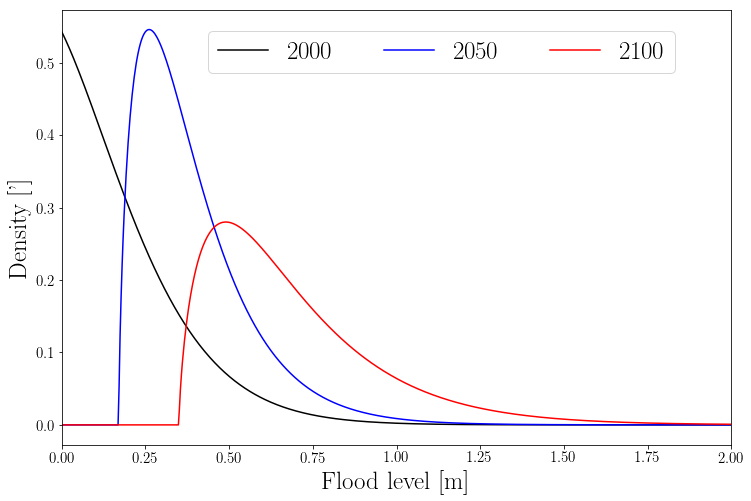

In [976]:
import scipy.stats as stats
#fit_alpha, fit_loc, fit_beta=stats.gamma.fit(y2100_s)
param = stats.gamma.fit(y2100_s, floc=0)
n_x=linspace(0,3.0,1000)


mm_2000=sum(p_2000)
param_2000 = [7.0, -0.640,0.09]
pdf_fitted = stats.gamma.pdf(n_x, *param_2000)
plot(n_x, pdf_fitted/3., color='k',label="2000")



mm_2050=sum(p_2050)
param_2050 = [1.7, 0.17,0.13]
pdf_fitted = stats.gamma.pdf(n_x, *param_2050)
plot(n_x, pdf_fitted/6., color='b',label="2050")


param_2100 = [1.7, 0.35,0.2]
pdf_fitted = stats.gamma.pdf(n_x, *param_2100)
mm_2100=sum(p_2100)
plot(n_x, pdf_fitted/7.6, color='r',label="2100")

legend(loc='upper left', bbox_to_anchor=(0.2,0.98), fancybox=True, shadow=False, ncol=4, numpoints=1)

# plot the histogram
# plot(x_2100, p_2100/mm_2100, 'ro')
# plot(x_2050, p_2050/mm_2050, 'bo')
# plot(x_2000, p_2000/mm_2000, 'ko')
xlim(0,2)
#ylim(-0.5,1)
xlabel("Flood level [m]",size=25)
ylabel("Density [']",size=25)
savefig('flood_level_prob.png',dpi=501, bbox_inches="tight")

In [871]:
year[10]

2100.0

In [979]:
for i in range(nyear):
    fname="year_{year}.dat".format(year=str(int(year[i])))
    print fname
    outfile=open(fname,'w')
    savetxt(outfile, max_val[i,:,:].T,fmt='%6.3e')
    outfile.close()


    #     for j in range(neq):
#         dummy = '{test:3.2f}'.format(test=eqf[j])
#         mag_name = dummy.replace('.', '')
#         for k in range(nreali):

year_2000.dat
year_2010.dat
year_2020.dat
year_2030.dat
year_2040.dat
year_2050.dat
year_2060.dat
year_2070.dat
year_2080.dat
year_2090.dat
year_2100.dat
year_2110.dat
year_2120.dat
year_2130.dat
year_2140.dat
year_2150.dat
year_2160.dat
year_2170.dat
year_2180.dat
year_2190.dat
year_2200.dat
